In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Final - Fall Semester 2016

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions (you can copy from the notes).
1. Do not use piazza for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the final will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE Tuesday (and more so before the exam starts).

Good luck!

## Question 1

Consider the BVP
$$
    u_{xx} = -\sin x
$$
with $u(0) = 0$ and $u(1) = 3$.

**(a)** [10] Discretize Poisson problem above using a second-order, centered difference method with $N = [32, 64, 128, 256]$ points and solve the resulting system of equations using the SOR method.  Compute the convergence to the true solution in the $\ell_2$ norm of the ODE and the $\ell_2$ norm of the difference between subsequent steps of the iteration count.  Plot both convergences vs. the iteration count on the same plot for $\omega = [1.8, \omega_{\text{opt}}, 1.9]$ where $\omega_{\text{opt}}$ is the optimal value presented in class for each of the values of $N$ (please organize your plots so they are easy to read (for instance in a properly sized $3 \times 4$ grid).  Instead of computing the expected number of iterations always take 300 instead.

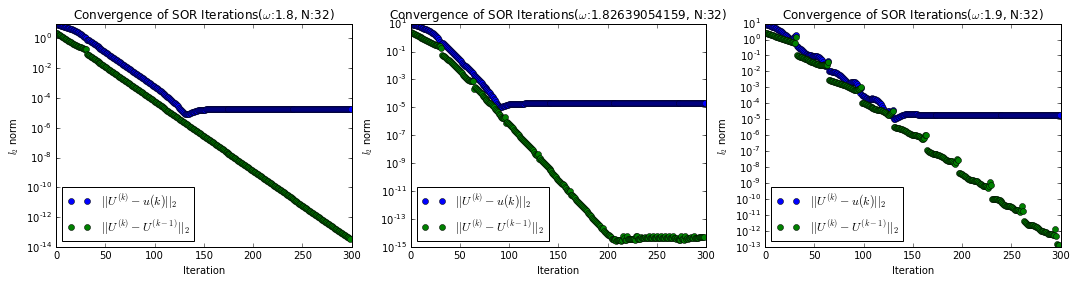

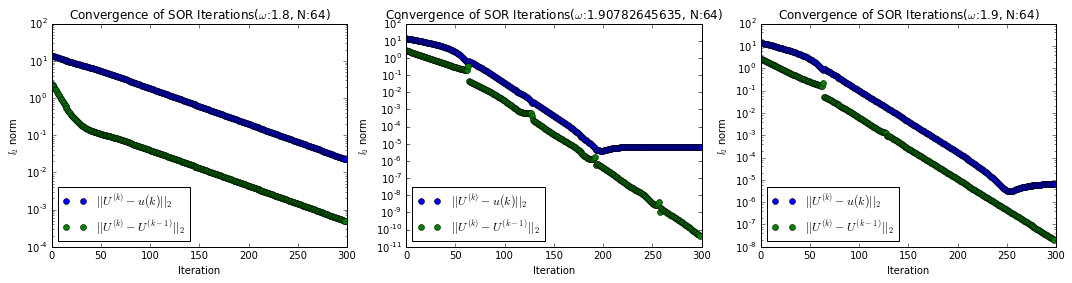

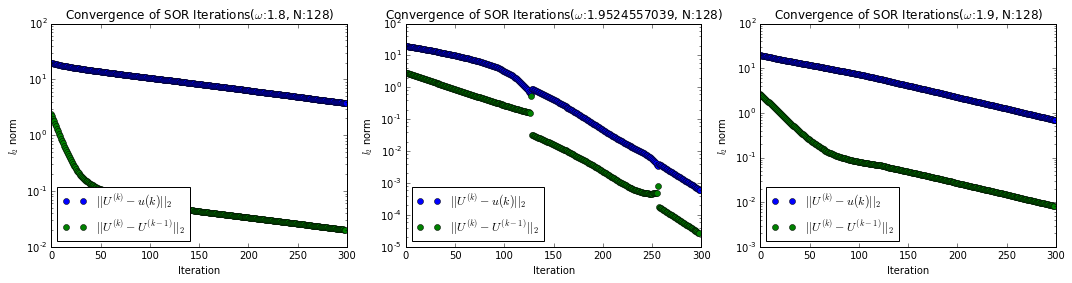

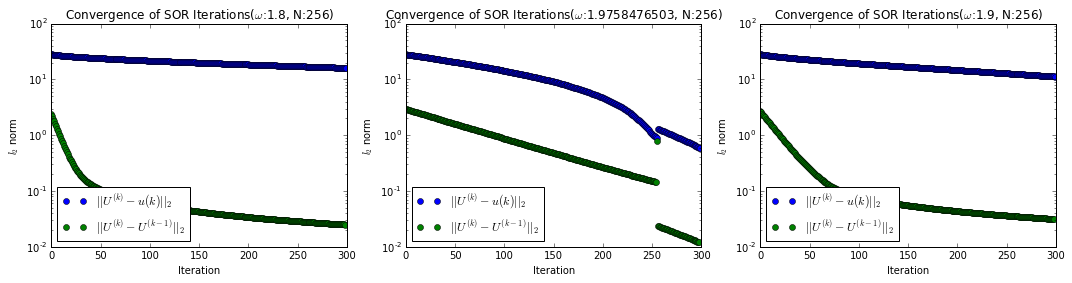

In [2]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: -numpy.sin(x)
u_true = lambda x: (3.0-numpy.sin(1.0))*x + numpy.sin(x)

for (j,N) in enumerate([32,64,128,256]):
    # Descretization
    x_bc = numpy.linspace(a, b, N + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (N + 1)

    # SOR parameter
    omega = [1.8, 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x)), 1.9]

    # Given iterations number
    iterations_SOR = 300
    
    # Plot result
    fig = plt.figure()
    fig.set_figwidth(fig.get_figwidth()*3)
    
    for m in xrange(3):
        # Solve system
        # Initial guess for iterations
        U = numpy.zeros(N + 2)
        U[0] = u_a
        U[-1] = u_b
        convergence_SOR = numpy.zeros(iterations_SOR)
        convergence_SOR_diff = numpy.zeros(iterations_SOR-1)
        for k in xrange(iterations_SOR):
            for i in xrange(1, N + 1):
                U_gs = 0.5 * (U[i-1] + U[i+1] - delta_x**2 * f(x_bc[i]))
                U[i] += omega[m] * (U_gs - U[i])

            convergence_SOR[k] = numpy.linalg.norm(u_true(x_bc) - U, ord=2)
            if k > 0:
                convergence_SOR_diff[k-1] = numpy.linalg.norm(U - U_back, ord=2)
            U_back = U.copy()
        #Plot related
        axes = fig.add_subplot(1, 3, m+1)
        axes.semilogy(range(iterations_SOR), convergence_SOR, 'o', label="$||U^{(k)} - u(k)||_2$")
        axes.semilogy(range(iterations_SOR-1), convergence_SOR_diff, 'o', label="$||U^{(k)} - U^{(k-1)}||_2$")
        axes.set_title("Convergence of SOR Iterations($\omega$:%s, N:%s)" %(omega[m],N))
        axes.set_xlabel("Iteration")
        axes.set_ylabel("$l_2$ norm")
        axes.legend(loc=3)
    
    plt.show()

**(b)** [5] Describe what you observe from part (a).  Please comment on the following
1. Comment on the convergence rates, how steady are they (are the slopes constant).
2. Compare the optimal value of $\omega$ vs. the others.
3. Why do you suppose those kinds in some of the convergence rates are happening?
4. Describe and explain the different behavior between the convergences we plotted in each plot.
5. For the $N = 32$ case why does the error convergence stall?

### Comment:

1)In most of situation, the convergence rates are not steady. In general, the convergence rates will become smaller as the iteration increase. In addition, the convergence rate of $||U^{(k)} - U^{(k-1)}||_2$ (norm of the difference between subsequent steps) is quicker than $||U^{(k)} - u(k)||_2$ (norm of the ODE).

2)For the optimal $\omega$, compared with the same N, it has a quick convergence rate than others. 

3)For the kinks (break points), it happens to SOR bacause the convergence rates for nonlinear problem sometimes will change as iteration increase. When it found a better solution, it will jump to the solution which result in a break points.

4)The relation with $\omega$: when the $\omega$ approach optimal, the convergance rate will increase.

$\quad$The relation with $N$: the bigger N will result in a slow congergence rates.

5)For the $N=32$, as interations increase, the minimum norm have reached $10^{-15}$, which is approximate machine error. Therefore, it stall because it cannot reach better accuracy.

**(c)** [5] Let $g(\omega) = \rho(G(\omega))$ be the spectral radius of the iteration matrix $G$ for a given value of $\omega$.  Write a function that computes $g(\omega)$ for a given value of $\omega$ and $N$.

In [3]:
def g(omega, N):
    # Construct matrix A
    A = numpy.zeros((N, N))
    diagonal = numpy.ones(N)
    A += numpy.diag(diagonal * 2.0, 0)
    A += numpy.diag(-diagonal[:-1], 1)
    A += numpy.diag(-diagonal[:-1], -1)
    #Get D, L, U
    L = numpy.zeros((N, N))
    U = numpy.zeros((N, N))
    D = numpy.zeros((N, N))
    for i in xrange(N):
        for j in xrange(N):
            if i == j:
                D[i,j] = A[i,j]
            if i > j:
                L[i,j] = A[i,j]
            if i < j:
                U[i,j] = A[i,j]
    #Get M
    M = numpy.zeros((N, N))
    M = (1/omega)*(D-omega*L)
    #Get N
    NN = numpy.zeros((N, N))
    NN = (1/omega)*((1-omega)*D+omega*U)
    G = numpy.zeros((N, N))
    G = numpy.dot(numpy.linalg.inv(M),NN)
    #Get eign values
    eig_values = numpy.linalg.eigvals(G)
    spec_radius = max(numpy.abs(eig_values))
    return spec_radius

In [4]:
numpy.testing.assert_allclose(0.93967633319, g(1.93967633319, 100), atol=1e-8)
print "Success!"

Success!


**(d)** [5] Plot the function $g(\omega)$ for $N = [8, 16, 32, 64, 128]$ for $\omega \in [0, 3.5]$ (you may not be able to go all the way to 0).  Also find the optimal $\omega$ using an appropriate numerical method from class to within $10^{-8}$ of the **known optimal value** and plot the minimum on your plots.  Also plot lines on your figures representing the values of $g(\omega)$ that will diverge and our theoretical range of valid $\omega$s.

Known optimal omega 1.49029059657
Calculated optimal omega 1.49029059388
Known optimal omega 1.68954662274
Calculated optimal omega 1.68954661654
Known optimal omega 1.82639054159
Calculated optimal omega 1.8263905326
Known optimal omega 1.90782645635
Calculated optimal omega 1.9078264563
Known optimal omega 1.9524557039
Calculated optimal omega 1.95245569979


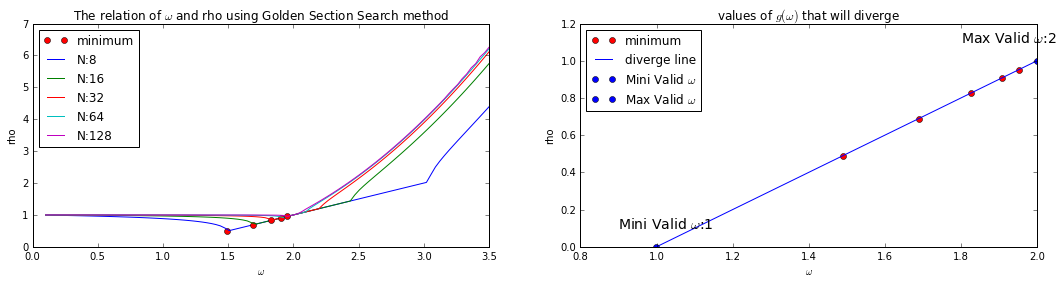

In [5]:
###Use Golden Section Search to find optimal omega
phi = (numpy.sqrt(5.0) - 1.0) / 2.0
TOLERANCE = 1e-8
MAX_STEPS = 100

# Plot related
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*3)
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

#Golden section search algorithm
for (j,N) in enumerate([8,16,32,64,128]):
    #Get the known optimal omega
    t = numpy.linspace(0.1, 3.5, 100)
    delta_x = 1.0 / (N + 1)
    omega_opt = 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x))
    print 'Known optimal omega',omega_opt
    #Golden Section Search
    x = [0.2, None, None, 3.2]
    x[1] = x[3] - phi * (x[3] - x[0])
    x[2] = x[0] + phi * (x[3] - x[0])
    for n in xrange(1, MAX_STEPS + 1):
        g_1 = g(x[1],N)
        g_2 = g(x[2],N)

        if g_1 < g_2:
            x[3] = x[2]
            x[2] = x[1]
            x[1] = x[3] - phi * (x[3] - x[0])
        else:
            x[0] = x[1]
            x[1] = x[2]
            x[2] = x[0] + phi * (x[3] - x[0])
        #Calculate the error with known optimal value
        if numpy.abs(x[0]-omega_opt) < TOLERANCE:
            success = True
            break
    #Plot calculated points and numbers
    if j == 0:
        axes1.plot(x[0],g(x[0],N),'ro',label="minimum")
        axes2.plot(x[0],g(x[0],N),'ro',label="minimum")
        x1 = x[0]
        y1 = g(x[0],N)
    if j > 0:
        axes1.plot(x[0],g(x[0],N),'ro')
        axes2.plot(x[0],g(x[0],N),'ro')
        x2 = x[0]
        y2 = g(x[0],N)
    print 'Calculated optimal omega',x[0]
    #Plot the lines
    omega = numpy.linspace(0.1,3.5,100)
    gg = numpy.zeros(100)
    for i in xrange(100):
        gg[i] = g(omega[i], N)
    axes1.plot(omega,gg,'-',label="N:%s" %(N))
#Figure 1 related
axes1.set_title("The relation of $\omega$ and rho using Golden Section Search method")
axes1.set_xlabel("$\omega$")
axes1.set_ylabel("rho")
axes1.legend(loc=2)
#Figure 2 related
y = numpy.linspace(0.0,1.0,10)
#Plot the line of figure 2
axes2.plot((y-y1)*(x2-x1)/(y2-y1)+x1,y,label="diverge line")
axes2.plot((0.0-y1)*(x2-x1)/(y2-y1)+x1,0.0,'bo',label="Mini Valid $\omega$")
#Valid mini-value point
mini_vld = 1
axes2.text(0.9, 0.1, "Mini Valid $\omega$:%s"%mini_vld, fontsize=14)
axes2.plot(2,(y2-y1)*(2-x1)/(x2-x1)+y1,'bo',label="Max Valid $\omega$")
#Valid max-value point
max_vld = 2
axes2.text(1.8, 1.1, "Max Valid $\omega$:%s"%max_vld, fontsize=14)
axes2.set_title("values of $g(\omega)$ that will diverge")
axes2.set_xlabel("$\omega$")
axes2.set_ylabel("rho")
axes2.legend(loc=2)

**(e)** [5] Comment on what you observe and interpret the changes in the function $g(\omega)$, especially for $\omega > 2$.

### Comment:

1)For the function $g(\omega)$, different $\omega$ correspond to the different $\rho$, and it has a optimal $\omega$ that make the $\rho$ smallest. Additionally, the smallest $\rho$ with $\omega_{opt}$ has a relation that $\rho = \omega_{opt} - 1$.

2)The relation of $g(\omega)$ with $\omega$, when $\omega$ is small, $g(\omega)$ will decrease as $\omega$ increase. After $g(\omega)$ reach smallest number (reach optimal $\omega$), the $g(\omega)$ will increase as $\omega$ increase.

3)As $N$ increase, the smallest $\rho$ become bigger, and the $\omega_{opt}$ also become bigger.

4)When $\omega>2$, the $g(\omega)$ will bigger than 1, which means that it will diverge. However, the optimal $\omega_{opt}$ will approach 2.

5)As it shows on figure(2), the theoretical range of $\omega$ is 1~2, therefore, the related range of minimum $\rho$  is 0~1.

## Question 2

Consider the third order initial value problem
$$
    \begin{split}
    &v'''(t) + v''(t) + 4v'(t) + 4v(t) = 4t^2 + 8t - 10,\\
    &v(0) = -3,\quad v'(0) = -2,\quad v''(0) = 2.
    \end{split}
$$

**(a)** [5] Verify that the function
$$
v(t) = -\sin(2t) + t^2 - 3
$$
is a solution to this problem.  How do you know it is the unique solution?

### Solve 

$$v'(t)=-2cos(2t) + 2t$$

$$v''(t)=4sin(2t) + 2$$

$$v'''(t)=8cos(2t)$$

Plugging into the third-order equation yields:
$$(8 cos(2t)) + (4sin(2t)+2) + 4 (-2cos(2t)+2t) + 4(-sin(2t)+t^{2}-3) = 4t^{2} + 8t - 10$$

Next, put the initial conditions:

$$v(0) = 0 + 0 -3 = -3$$

$$v'(0) = -2 \cdot 1 + 0 = -2$$

$$v''(0) = 4 \cdot 0 + 2 = 2$$

Therefore, the solution $v(t) = -\sin(2t) + t^2 - 3$ is the unique solution to this problem.

**(b)** [5] Rewrite this problem as a first order system of the form $u'(t) =
f(u(t), t)$ where $u(t) \in \mathbb{R}^3$.  Make sure you also specify the
initial condition $u(0) = \eta$ as a 3-vector.

### Solve

Let $U = (u,u',u'')^{T}$, then
$$
U'(t) = \begin{bmatrix}
 0 & 1 & 0 \\
 0 & 0 & 1 \\
 -4&-4 &-1 \\
 \end{bmatrix} \cdot U(t) + \begin{bmatrix}
 0  \\
 0  \\
 4t^{2}+8t-10 \\
 \end{bmatrix}
$$

and the initial conditions transform to 
$U(0) = (-3,-2,2)^{T}$

**(c)** [7] Write a function `solve_AB4` that solves the ODE using a 4-step Adams-Bashforth method over the time interval $0\leq t \leq 10$.  Make sure to use an appropriate method to startup the method.  The function should take as arguments the number of time points $N$ (which includes the initial time and final time) and the initial condition $\eta$.  Return the vector of time points $t$ and the solution $U$.

In [42]:
def solve_AB4(N, eta):
    def f(t, u):
        return numpy.array([u[1], u[2], -4.*u[0]-4.*u[1]-u[2]+4.*t*t+8.*t-10.])
    t = numpy.linspace(0.0, 10, N)
    delta_t = t[1] - t[0]
    # Use Rk-4 to start the method
    u_ab4 = numpy.empty((3, N))
    u_ab4[:,0] = eta
    for i in xrange(3):
        t_n = i*delta_t
        y_1 = u_ab4[:,i]
        y_2 = u_ab4[:,i] + 0.5 * delta_t * f(t_n,y_1)
        y_3 = u_ab4[:,i] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = u_ab4[:,i] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        u_ab4[:,i+1] = u_ab4[:,i] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    # Use 4-step Adams-Bashforth method 
    for n in xrange(0,len(t)-4):
        u_ab4[:,n+4] = u_ab4[:,n + 3] + delta_t / 24.0 * (-9.0* f(t[n], u_ab4[:,n]) + 37.0 * f(t[n+1], u_ab4[:,n+1]) - 59.0 * f(t[n+2], u_ab4[:,n+2]) + 55.0 * f(t[n+3], u_ab4[:,n+3]))
    U = u_ab4
    return t, U

In [43]:
t, U = solve_AB4(200, [-3.0, -2.0, 2.0])
print "Largest error = %s " % numpy.linalg.norm(-numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], ord=numpy.infty)
numpy.testing.assert_allclose(U[0, :], -numpy.sin(2.0 * t) + t**2 - 3.0, rtol=1e-8, atol=1e-3)
print "Success!"

Largest error = 0.000665230309252 
Success!


**(d)** [7] Implement a function similar to part (c) but use a 3-step Adams-Bashforth-Moulton predictor/corrector method (3 step methods for both the predictor and corrector).

In [50]:
def solve_ABM3(N, eta):
    def f(t, u):
        return numpy.array([u[1], u[2], -4.*u[0]-4.*u[1]-u[2]+4.*t*t+8.*t-10.])
    t = numpy.linspace(0.0, 10, N)
    delta_t = t[1] - t[0]
    # Use Rk-4 to start the method
    U = numpy.empty((3, N))
    U[:,0] = eta
    for i in xrange(3):
        t_n = i*delta_t
        y_1 = U[:,i]
        y_2 = U[:,i] + 0.5 * delta_t * f(t_n,y_1)
        y_3 = U[:,i] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = U[:,i] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        U[:,i+1] = U[:,i] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    # 3-step Adams-Bashforth-Moulton predictor/corrector method
    for n in xrange(t.shape[0] - 3):
        U[:,n+3] = U[:,n+2] + delta_t / 12.0 *(5.0*f(t[n], U[:,n]) - 16.0*f(t[n+1], U[:,n+1]) + 23.0*f(t[n+2], U[:,n+2]))
        U[:,n+3] = U[:,n+2] + delta_t / 24.0 *(f(t[n], U[:,n]) - 5.0*f(t[n+1], U[:,n+1]) + 19.0*f(t[n+2], U[:,n+2]) + 9.0*f(t[n+3], U[:,n+3]))
    return t, U

In [51]:
t, U = solve_ABM3(200, [-3.0, -2.0, 2.0])
print "Largest error = %s " % numpy.linalg.norm(-numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], ord=numpy.infty)
numpy.testing.assert_allclose(U[0, :], -numpy.sin(2.0 * t) + t**2 - 3.0, rtol=1e-8, atol=1e-3)
print "Success!"

Largest error = 0.000219159558625 
Success!


**(e)** [6] Plot the convergence for each of your implemented methods and comment on their convergence rates.

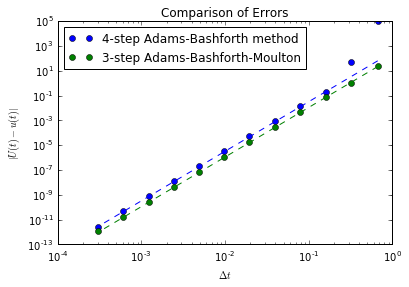

In [54]:
def f(t):
    return -numpy.sin(2.0 * t) + t**2 - 3.0
eta = [-3.0, -2.0, 2.0]
N = [2**n for n in range(4,16)]
delta_t = numpy.empty(len(N))
AB4 = numpy.zeros(len(N))
ABM3 = numpy.zeros(len(N))
for i in xrange(len(N)):
    t = numpy.linspace(0, 10, N[i])
    delta_t[i] = t[1] - t[0]
    # 4-step Adams-Bashforth method
    t, U = solve_AB4(N[i], eta)
    AB4[i] = numpy.linalg.norm(delta_t[i]*(f(t) - U[0,:]), ord=1)
    # 3-step Adams-Bashforth-Moulton
    t, U = solve_ABM3(N[i], eta)
    ABM3[i] = numpy.linalg.norm(delta_t[i]*(f(t) - U[0,:]), ord=1)
#Plot data
plt.loglog(delta_t,AB4,'bo',label="4-step Adams-Bashforth method")
plt.loglog(delta_t,ABM3,'go',label="3-step Adams-Bashforth-Moulton")
#Plot convergence rates
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
plt.loglog(delta_t, order_C(delta_t[2], AB4[2], 4.0) * delta_t**4.0, '--b')
plt.loglog(delta_t, order_C(delta_t[2], ABM3[2], 4.0) * delta_t**4.0, '--g')
plt.title("Comparison of Errors")
plt.xlabel("$\Delta t$")
plt.ylabel("$|U(t) - u(t)|$")
plt.legend(loc=2)

### Comment:

Both of the 4-step Adams-Bashforth method and 3-step Adams-Bashforth-Moulton have around 4 order converge rates.

When the interval is big (such as 1 and 0.5),the 3-step Adams-Bashforth-Moulton converge fast. But as the inverval become smaller, the convergence rates for these two methods (AB-4 and ABM-3) are almost the same. 

## Question 3

Determine the coefficients $\beta_0,~\beta_1,~\beta_2$ for the third
order, 2-step Adams-Moulton method.  We will do this two different ways:

**(a)** [10] Using the general expression for the local truncation error for multi-step methods
$$
    \tau^{n + r} = \frac{1}{\Delta t} \left (\sum^r_{j=0} \alpha_j u(t_{n+j}) - \Delta t \sum^r_{j=0} \beta_j f(u(t_{n+j})) \right ).
$$
Note that $\alpha_0 = 0$, $\alpha_1 = -1$, and $\alpha_2 = 1$.

### Solve

For the truncation error of multi-step methods:
$$
    \tau^{n + r} = \frac{1}{\Delta t} \left (\sum^r_{j=0} \alpha_j u(t_{n+j}) - \Delta t \sum^r_{j=0} \beta_j f(u(t_{n+j})) \right ).
$$

Using the general expansion and evalution of the Taylor series about $t_n$ we have
$$\begin{aligned}
    u(t_{n+j}) &= u(t_n) + j \Delta t u'(t_n) + \frac{1}{2} (j \Delta t)^2 u''(t_n) + \mathcal{O}(\Delta t^3) \\
    u'(t_{n+j}) &= u'(t_n) + j \Delta t u''(t_n) + \frac{1}{2} (j \Delta t)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)
\end{aligned}$$

leading to

$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u_{n+j} + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
&~~~~~~~+ \cdots + \Delta t^{q - 1} \left (\frac{1}{q!} \left(j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$$

The method is consistent if the first two terms of the expansion vanish.

For 2-step Adams-Moulton method, $r = 2$

For term 1, we get:$\sum^r_{j=0} \alpha_j = 0$.

Given that $\alpha_0 = 0$, $\alpha_1 = -1$, and $\alpha_2 = 1$, we can get that:

$$\sum^2_{j=0} \alpha_j = \alpha_0 + \alpha_1 + \alpha_2 = 0$$

For term 2, we get: $\sum^r_{j=0} j \alpha_j = \sum^r_{j=0} \beta_j$

$$\sum^2_{j=0} j \alpha_j = \sum^2_{j=0} \beta_j$$

Since $ 0 \cdot \alpha_0 + 1 \cdot \alpha_1 + 2 \cdot \alpha_2 = 1 $

We can get:

\begin{equation} \tag{1}
\beta_0 + \beta_1 + \beta_2 = 1
\end{equation}

From taylor thrid and fourth expansion terms, we get that:

For term 3, we get:$\sum^{r}_{j=0} \frac{1}{2} j^2 \alpha_j - \sum^{r}_{j=0} j \beta_j = 1$

$$
\sum^{2}_{j=0} \frac{1}{2} j^2 \alpha_j - \sum^{2}_{j=0} j \beta_j = 1
$$

Since $ 0 \cdot \alpha_0 + \frac{1}{2} \cdot \alpha_1 + 2 \cdot \alpha_2 - 0 \cdot \beta_0 - 1 \cdot \beta_1 - 2 \cdot \beta_2 = 1 $

We can get:

\begin{equation} \tag{2}
\beta_1 + 2 \cdot \beta_2 = \frac{1}{2}
\end{equation}

For term 4, we get:$\sum^{r}_{j=0} \frac{1}{3!} j^3 \alpha_j - \sum^{r}_{j=0} \frac{1}{2} j^2 \beta_j = 1$

$$\sum^{2}_{j=0} \frac{1}{3!} j^3 \alpha_j - \sum^{2}_{j=0} \frac{1}{2} j^2 \beta_j = 1$$

Since $ 0 \cdot \alpha_0 + \frac{1}{6} \cdot \alpha_1 + \frac{4}{3} \cdot \alpha_2 - 0 \cdot \beta_0 - \frac{1}{2} \cdot \beta_1 - 2 \cdot \beta_2 = 1 $

we can get:
\begin{equation} \tag{3}
\beta_1 + 4 \cdot \beta_2 = \frac{1}{3}
\end{equation}

Combine the equation of (1)(2)(3), we can drive:


$$    \beta_0 = \frac{5}{12}$$

$$    \beta_1 = \frac{8}{12}$$

$$    \beta_2 = -\frac{1}{12}$$

By $\tau^{n + r} = \frac{1}{\Delta t} \left (\sum^r_{j=0} \alpha_j u(t_{n+j}) - \Delta t \sum^r_{j=0} \beta_j f(u(t_{n+j})) \right ).$

We can get:

$$u_{n+2} = u_{n+1} + \frac{\Delta t}{12}(- u'_{n} + 8 u'_{n+1} +5 u'_{n+2} )$$

That is 2-step Adams-Moulton methods:

$$U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (-f(U_n) + 8f(U_{n+1}) + 5f(U_{n+2}))$$

**(b)** [10] Using the relation
$$
    u(t_{n+2}) = u(t_{n+1}) + \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds.
$$
Interpolate  a quadratic polynomial $p(t)$ through the three values $f(U^n),~f(U^{n+1})$ and $f(U^{n+2})$ and then integrate this polynomial exactly to obtain the formula.  The coefficients of the polynomial will depend on the three values $f(U^{n+j})$.   It's easiest to use the "Newton form" of the interpolating polynomial and consider the three
times $t_n=-\Delta t$, $t_{n+1}=0$, and $t_{n+2}=\Delta t$ so that $p(t)$ has the form
$$
    p(t) = A + B(t+\Delta t) + C(t+\Delta t)t
$$
where $A,~B$, and $C$ are the appropriate divided differences based on the data.  Then integrate from $0$ to $\Delta t$.   (The method has the same coefficients at any time, so this is valid.)

### Solve

From the equation above, we can get:
$$
    u(t_{n+2}) - u(t_{n+1}) = \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds.
$$
Given that the interpolating polynomial is:
$$
    p(t) = A + B(t+\Delta t) + C(t+\Delta t)t
$$
We can get that:
$$
\int_{t_{n+1}}^{t_{n+2}}\,p(t)\,ds = \int_{0}^{\Delta t}\,A + B(t+\Delta t) + C(t+\Delta t)t\,dt = A\Delta t + \frac{3}{2}B\Delta t^2 + \frac{5}{6}C\Delta t^3
$$
Since p(t) go through $t_n=-\Delta t$, $t_{n+1}=0$ and $t_{n+2}=\Delta t$ with $f(U^n),~f(U^{n+1})$ and $f(U^{n+2})$

From above, we get: $A = f(u_n)$, $A + B\Delta t = f(u_{n+1})$, $A + 2\Delta t B + 2\Delta t^2 C = f(u_{n+2})$
$$A=f(u_n)$$ 

$$B =  \frac{f(u_{n+1})-f(u_{n})}{\Delta t}$$

$$C = \frac{f(u_{n+2})-2f(u_{n+1})+f(u_{n})}{2\Delta t^2}$$

Put the A,B,C into the formula we get before: $A\Delta t + \frac{3}{2}B\Delta t^2 + \frac{5}{6}C\Delta t^3$

we have:
$$
f(u_n)\Delta t + \frac{3}{2} \frac{f(u_{n+1})-f(u_{n})}{\Delta t} \Delta t^2 + \frac{5}{6} \frac{f(u_{n+2})-2f(u_{n+1})+f(u_{n})}{2\Delta t^2}\Delta t^3 \\
\\
=\Delta t \left(  -\frac{1}{12}f(u_n) + \frac{8}{12}f(u_{n+1}) + \frac{5}{12}f(u_{n+2})  \right)
$$

That is 2-step Adams-Moulton methods:

$$U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (-f(U_n) + 8f(U_{n+1}) + 5f(U_{n+2}))$$

## Question 4

A simplification of Gaussian elimination and $LU$ factorization, known as **Cholesky factorization**, comes about when the matrix in question is **symmetric** if $A \in \mathbb R^{m \times m}$ or **hermitian** when $A \in \mathbb C^{m \times m}$.

**(a)** [5 points] In the case where the matrix is $A \in \mathbb R^{2 \times 2}$ and symmetric what would happen if we tried to $LU$ factorize $A$ in the form
$$
    A = \begin{bmatrix}
        A_{11} & k \\
        k & A_{22}
        \end{bmatrix}?
$$

### Solve

$$
       L_{1} = \begin{bmatrix}
                     1     & 0 \\
         -\frac{k}{A_{11}} & 1 
        \end{bmatrix}
$$

so that 
$$
       L_{1}A = \begin{bmatrix}
            1     & 0 \\
           -\frac{k}{A_{11}} & 1 
        \end{bmatrix} 
        \begin{bmatrix}
        A_{11} & k \\
        k & A_{22}
        \end{bmatrix}
        = \begin{bmatrix}
        A_{11} & k \\
        0 & A_{22}-\frac{k^2}{A_{11}}
        \end{bmatrix}
$$

$$
        L= L_{1}^{-1} = \begin{bmatrix}
                     1     & 0 \\
         \frac{k}{A_{11}} & 1 
        \end{bmatrix}
$$

$$
        U= \begin{bmatrix}
        A_{11} & k \\
        0 & A_{22}-\frac{k^2}{A_{11}}
        \end{bmatrix}
$$

**(b)** [5 points] Proceeding from part (a) Cholesky factorization then zeros the remaining entry above the diagonal.  What are the forms of the matrices given our previous $A$ so that we can write $A$ as $A = R^T D R$ where $D$ is a diagonal matrix and $R$ is upper triangular?

### Solve

Let $L = R^{T}, R = L^{T}$

Therefore,

$$
D = (R^{T})^{-1}AR^{-1} = L^{-1}A(L^{T})^{-1} = 
        \begin{bmatrix}
                     1     & 0 \\
         -\frac{k}{A_{11}} & 1 
        \end{bmatrix}
        \begin{bmatrix}
        A_{11} & k \\
        k & A_{22}
        \end{bmatrix}
         \begin{bmatrix}
              1     & -\frac{k}{A_{11}} \\
         0 & 1 
        \end{bmatrix}
        =\begin{bmatrix}
        A_{11} & 0 \\
        0 & A_{22}-\frac{k^2}{A_{11}}
        \end{bmatrix}
$$

Therefore, 
$$
     D =\begin{bmatrix}
        A_{11} & 0 \\
        0 & A_{22}-\frac{k^2}{A_{11}}
        \end{bmatrix}
$$
$$
     R = \begin{bmatrix}
             1     & \frac{k}{A_{11}} \\
         0 & 1 
        \end{bmatrix}      
$$

**(c)** [5 points] Generalizing this procedure we can write the Cholesky factorization as a sequence of matrices
$$
    A = \underbrace{R_1^T R_2^T \cdots R_{m-1}^T R_{m}^T}_{R^T} \underbrace{R_m R_{m-1} \cdots R_2 R_1}_{R}.
$$
In the end the pseudo-code looks like
```
R = A
for k = 1 to m
    for j = k + 1 to m
        R[j, j:m] = R[j, j:m] - R[k, j:m] R[k, j] / R[k, k]
    R[k, k:m] = R[k, k:m]/sqrt(R[k,k])
```
Implement this factorization noting that this only transforms the upper triangular part of the matrix into the correct factor (i.e. zero out the lower triangular part of the matrix).

In [11]:
def cholesky_factorization(A):
    R = A.copy()
    m = len(R)
    for k in xrange(m):
        for j in xrange(k+1,m):
            R[j,j:m] = R[j,j:m] - R[k, j:m]*R[k,j]/R[k,k]
            R[j,0:j] = 0
        R[k,k:m] = R[k,k:m]/numpy.sqrt(R[k,k])
    return R

In [12]:
N = 10
A = numpy.random.normal(size=(N, N))
A = numpy.dot(A.transpose(), A)
R_n = numpy.linalg.cholesky(A).transpose()
R = cholesky_factorization(A)
numpy.testing.assert_allclose(R_n, R)
print "Success!"

Success!


**(d)** [5 points] Write a function that uses a Cholesky factorization and the appropriate substitution algorithm to solve $Ax = b$.

In [13]:
def solve_cholesky(A, b):
    R = cholesky_factorization(A)
    R_T = R.copy()
    R_T = R_T.transpose()
    R_T_inv = R_T.copy()
    R_T_inv = numpy.linalg.inv(R_T_inv)
    R_inv = R.copy()
    R_inv = numpy.linalg.inv(R_inv)
    # x = inv(R) * inv(R_T) * b
    x = numpy.dot(numpy.dot(R_inv, R_T_inv),b)
    return x

In [14]:
N = 10
A = numpy.random.normal(size=(N, N))
b = numpy.random.normal(size=N)
A = numpy.dot(A.transpose(), A)
x = solve_cholesky(A, b)
numpy.testing.assert_allclose(x, numpy.linalg.solve(A, b))
print "Success!"

Success!
